In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
def Distr_D_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(3.2))*(x[i]**(-1+(1/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_DIII_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(2.1))*(x[i]**(-1+(2/2)))*((1-x[i])**(-1/2))
    
    return p

In [4]:
df_Andreev_G_D = pd.read_csv(r'Channel/Andreev_G_D_Channel.txt', sep = '\t', header = None)
df_Andreev_P_D = pd.read_csv(r'Channel/Andreev_P_D_Channel.txt', sep = '\t', header = None)

df_Andreev_G_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_G_DIII_Channel.txt', sep = '\t', header = None)
df_Andreev_P_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_P_DIII_Channel.txt', sep = '\t', header = None)

df_Andreev_G_C = (1/2)*pd.read_csv(r'Channel/Andreev_G_C_Channel.txt', sep = '\t', header = None)
df_Andreev_P_C = (1/2)*pd.read_csv(r'Channel/Andreev_P_C_Channel.txt', sep = '\t', header = None)

df_Andreev_G_CI = (1/2)*pd.read_csv(r'Channel/Andreev_G_CI_Channel.txt', sep = '\t', header = None)
df_Andreev_P_CI = (1/2)*pd.read_csv(r'Channel/Andreev_P_CI_Channel.txt', sep = '\t', header = None)

In [5]:
df_Andreev_G_D.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.230823,1.003220,1.194940,2.67472,2.53233,3.19420,3.08718,4.16658,4.72781,5.12559
2,0.701984,1.138720,0.951599,2.13503,1.89082,2.74978,3.46570,4.02216,4.51188,5.49175
3,0.014860,0.940751,1.495180,1.86874,2.69529,3.55788,3.23188,4.43766,4.61428,5.45457
4,0.118598,0.962181,1.522060,1.94568,1.65451,2.95578,3.59079,4.24365,4.36120,4.86565
5,0.419285,0.945444,1.449480,2.47478,2.83063,3.22512,3.27706,3.99249,4.38692,5.36655
...,...,...,...,...,...,...,...,...,...,...
99996,0.338133,0.747441,1.648350,1.37627,2.53083,2.93376,3.52980,3.66762,4.63307,4.76531
99997,0.997287,0.963598,1.321150,1.63644,2.62123,2.66637,4.16055,3.47613,4.16668,5.77083
99998,0.456660,1.314840,1.502450,2.70291,1.84641,3.10987,3.23898,4.87919,4.30384,4.74709
99999,0.409717,0.893925,1.542580,2.51936,2.26718,3.14148,3.10951,3.28953,3.66891,5.25270


In [6]:
df_Andreev_G_DIII.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.810705,1.240370,1.385710,2.184855,2.118085,3.508300,3.846810,4.216185,4.637995,4.941720
2,0.519460,1.449480,1.695510,2.035360,2.768135,3.751305,3.346875,3.950720,4.659200,4.893480
3,0.999000,0.991750,1.163505,2.123830,2.745545,3.482370,4.185805,4.564170,4.539430,5.224600
4,0.946895,1.352260,1.135470,1.576345,2.115550,3.006965,3.674075,4.259365,4.695800,5.238200
5,0.861600,0.566100,1.763390,2.346005,2.695745,3.001335,3.502800,3.892940,4.627005,5.765900
...,...,...,...,...,...,...,...,...,...,...
99996,0.741485,1.176910,1.422900,1.869080,2.426600,3.314575,3.897305,4.025770,4.766105,5.496950
99997,0.501720,1.210315,1.871535,2.418550,2.620425,3.178030,3.887830,4.402390,4.679310,4.871175
99998,0.735275,1.226910,1.615780,2.200960,2.545685,2.723220,3.680505,4.012260,4.938185,4.956625
99999,0.998425,1.173265,2.240500,2.295230,2.249170,2.961390,3.163165,4.253605,4.563380,5.216750


In [7]:
df_Andreev_G_C.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.478823,1.252715,1.493310,2.552505,2.602185,3.759580,3.540505,4.863530,4.593240,6.17595
2,0.555240,1.044070,1.349460,2.380025,2.522645,3.740590,3.716950,4.750335,4.589670,6.22165
3,0.674550,1.402520,1.391650,2.410600,2.721780,3.818160,3.623235,4.701185,4.469125,6.44615
4,0.059316,1.000185,1.386535,2.466655,2.756620,3.645980,3.706630,5.182350,4.719985,6.09450
5,0.899275,1.242490,1.901450,2.556460,2.249275,3.798885,3.489410,4.894955,4.394250,6.48190
...,...,...,...,...,...,...,...,...,...,...
99996,0.491443,1.343840,1.198700,2.734425,2.608825,3.800850,3.833645,4.952075,4.399830,5.98175
99997,0.617395,1.523085,1.523345,2.422655,2.903780,3.559695,3.769385,5.030550,4.295155,6.32200
99998,0.786905,1.554510,1.310995,2.321435,2.628910,3.510305,3.663970,5.085450,4.518595,6.22060
99999,0.130299,1.731360,1.323360,2.653085,2.681255,3.609520,3.727430,4.915780,4.441145,6.42700


In [8]:
df_Andreev_G_CI.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.387709,1.004455,1.708130,2.441940,2.471940,3.731205,3.598250,4.870045,4.477315,6.10220
2,0.965345,1.717120,1.434835,2.313730,2.329170,3.699500,3.573055,4.755860,4.178725,6.19710
3,0.120431,0.930245,1.496720,2.675530,2.445445,3.794855,3.391310,5.104200,4.706385,6.52495
4,0.620340,1.214985,1.622465,2.704330,2.669430,3.453150,3.845060,4.850430,4.119510,6.15330
5,0.289811,0.746740,1.630280,2.131635,2.284845,3.658880,3.265915,5.052000,4.867510,5.69440
...,...,...,...,...,...,...,...,...,...,...
99996,0.580090,1.450425,0.974345,2.659075,2.277340,3.742810,3.470425,4.827160,4.284130,6.10550
99997,0.955525,1.029820,1.541130,2.539555,2.913185,3.749300,3.417235,4.610410,4.080320,6.32080
99998,0.610105,1.526515,1.320750,2.482460,2.697695,4.037700,3.298670,5.308600,4.817765,6.15240
99999,0.270726,1.357805,1.092225,2.584745,2.140280,3.658070,3.466830,4.625670,4.756010,5.89755


In [9]:
G_D = df_Andreev_G_D.values
P_D = df_Andreev_P_D.values

G_DIII = df_Andreev_G_DIII.values
P_DIII = df_Andreev_P_DIII.values

G_C = df_Andreev_G_C.values
P_C = df_Andreev_P_C.values

G_CI = df_Andreev_G_CI.values
P_CI = df_Andreev_P_CI.values

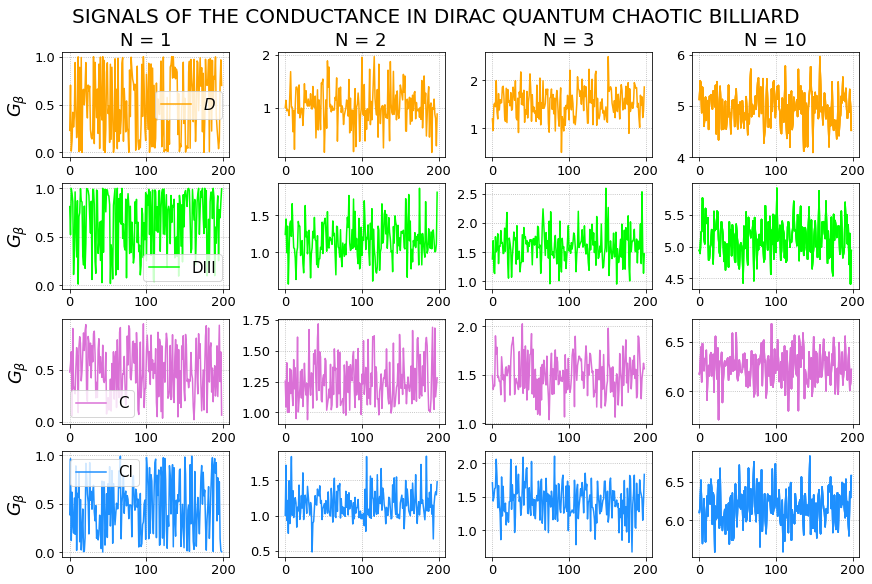

In [10]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN DIRAC QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_D[0:199,9], color='orange', label = r'D', alpha=1);
            axs[1,3].plot(G_DIII[0:199,9], color='lime', label = r'DIII', alpha=1);
            axs[2,3].plot(G_C[0:199,9], color='orchid', label = r'C', alpha=1);
            axs[3,3].plot(G_CI[0:199,9], color='dodgerblue', label = r'CI', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_D[0:199,j], color='orange', label = r'$D$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_DIII[0:199,j], color='lime', label = r'DIII', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_C[0:199,j], color='orchid', label = r'C', alpha=1);
                    else:
                        if (i == 3):
                            axs[i,j].plot(G_CI[0:199,j], color='dodgerblue', label = r'CI', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


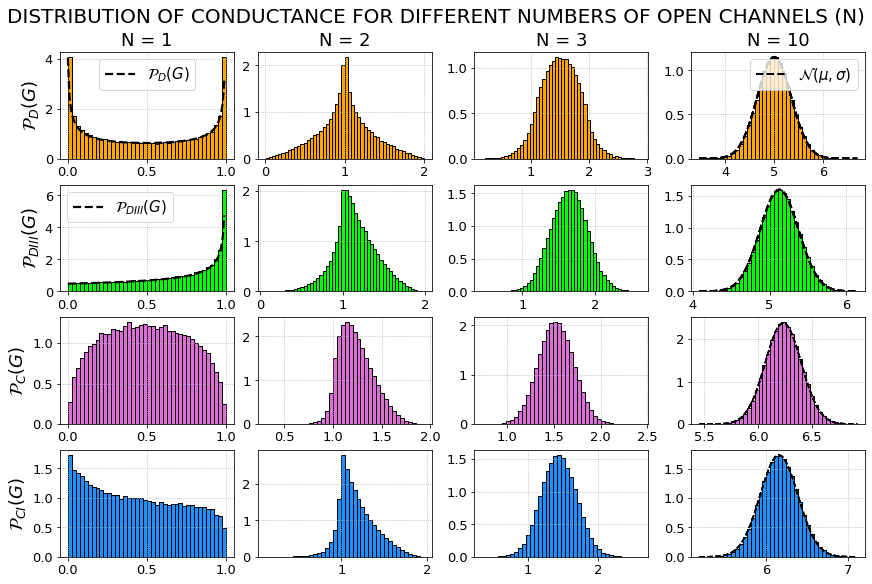

In [14]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(G_D[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,0].hist(G_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(G_C[:,0], bins = 40, color='orchid', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(G_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            if (i == 0):
                x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
                axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[0,0].legend(fontsize = 15, loc = "best")
            
            elif (i == 1):
                x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
                axs[1,0].plot(x, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[1,0].legend(fontsize = 15, loc = "best")
            
            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_D[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_C[:,9], bins = 40, color='orchid', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(G_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_D[:,9]), np.max(G_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_DIII[:,9]), np.max(G_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(G_C[:,9]), np.max(G_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_CI[:,9]), np.max(G_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(G_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_D[:,j], bins = 50, color='orange', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_C[:,j], bins = 40, color='orchid', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(G_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


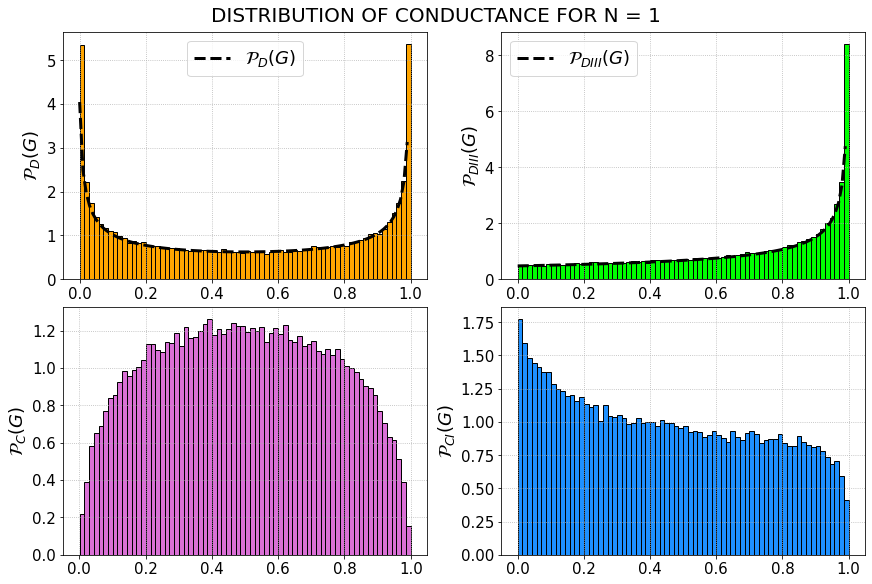

In [17]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(G_D[:,0], bins = 70, color='orange', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,0], bins = 70, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,0], bins = 70, color='orchid', alpha=1, density = True, histtype='bar', ec='black');
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)

axs[1,1].hist(G_CI[:,0], bins = 70, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')